In [25]:
import pandas as pd

df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# drop "name" column from data
df = df.drop(["name"], axis = 1)
# 0 means there is 1 previous owner(new car)
df['owner'] = df['owner'].apply(lambda x: 1 if x == "First Owner" else (2 if x == 'Second Owner' else (3 if x == 'Third Owner' else 4))).astype(int) 
# Simplify fuel types into 3 categories. Any fuel type that isn't petrol/diesel make up <10% of the dataset and should be lumped as other instead
df['fuel'] = df['fuel'].apply(lambda x:'Petrol' if x == 'Petrol' else ('Diesel' if x == 'Diesel' else 'Other'))
# Make dummy variables for categorical variables so we can model with the data
df = pd.get_dummies(df, columns = ['fuel','seller_type','transmission']) 
# Transform year column into a variable representing a car's age
df['year'] = 2023 - df['year'] 
# Rename Column name year to age
df = df.rename(columns = {"year" : "age"})
print("Processed Dataset:")
display(df.head(5))

Processed Dataset:


,age,selling_price,km_driven,owner,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,16,60000,70000,1,False,False,True,False,True,False,False,True
1,16,135000,50000,1,False,False,True,False,True,False,False,True
2,11,600000,100000,1,True,False,False,False,True,False,False,True
3,6,250000,46000,1,False,False,True,False,True,False,False,True
4,9,450000,141000,2,True,False,False,False,True,False,False,True


In [26]:
X = df.drop("owner", axis = 1)
y = df["owner"]

print("X:")
display(X.head(5))
print("y:")
display(y.head(5))

X:


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,16,60000,70000,False,False,True,False,True,False,False,True
1,16,135000,50000,False,False,True,False,True,False,False,True
2,11,600000,100000,True,False,False,False,True,False,False,True
3,6,250000,46000,False,False,True,False,True,False,False,True
4,9,450000,141000,True,False,False,False,True,False,False,True


y:


0    1
1    1
2    1
3    1
4    2
Name: owner, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split

# Splitting data into ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
display(X_train.head(5))
print("X_test:")
display(X_test.head(5))
print("y_train:")
display(y_train.head(5))
print("y_train:")
display(y_test.head(5))

X_train:


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
227,6,1500000,20000,True,False,False,False,True,False,False,True
964,5,500000,50000,True,False,False,False,True,False,False,True
2045,10,92800,25000,False,False,True,False,True,False,False,True
1025,12,95000,70000,True,False,False,False,True,False,False,True
4242,6,685000,72000,True,False,False,True,False,False,False,True


X_test:


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
3978,13,165000,80000,True,False,False,False,True,False,False,True
1448,4,250000,27000,False,False,True,False,True,False,False,True
2664,15,120000,41723,False,False,True,False,True,False,False,True
17,9,450000,141000,True,False,False,False,True,False,False,True
1634,7,730000,60000,True,False,False,False,True,False,True,False


y_train:


227     1
964     1
2045    2
1025    1
4242    1
Name: owner, dtype: int32

y_train:


3978    1
1448    1
2664    2
17      2
1634    2
Name: owner, dtype: int32

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_rescaled = scaler.fit_transform(X_train)
X_train_rescaled = pd.DataFrame(data = X_train_rescaled, columns = X.columns)
display(X_train_rescaled.head(5))

X_test_rescaled = scaler.fit_transform(X_test)
X_test_rescaled = pd.DataFrame(data = X_test_rescaled, columns = X.columns)
display(X_test_rescaled.head(5))

,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.107143,0.181841,0.024794,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.071429,0.058809,0.061988,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.250000,0.008711,0.030993,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.321429,0.008981,0.086783,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.107143,0.081570,0.089263,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.416667,0.016329,0.226361,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.041667,0.025901,0.074499,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.500000,0.011261,0.116685,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.250000,0.048423,0.401146,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.166667,0.079955,0.169054,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes" : [(64, 64,), (128, 128,)],
    "max_iter" : [500, 750, 1000],
    "alpha" : [0.025, 0.05],
}

mlp = MLPClassifier(activation='relu', solver='adam', batch_size='auto')

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_train_rescaled, y_train)

print("Optimal Hyperparameters: ", grid.best_params_)
print("Optimal Accuracy: ", grid.best_score_)

Optimal Hyperparameters:  {'alpha': 0.025, 'hidden_layer_sizes': (128, 128), 'max_iter': 1000}
Optimal Accuracy:  0.6921103808595775


In [29]:
from sklearn.neural_network import MLPClassifier

mlp_best = MLPClassifier(activation='relu', solver='adam', batch_size='auto', alpha = 0.025, hidden_layer_sizes = (128, 128,), max_iter = 1000)

mlp_best.fit(X_train_rescaled, y_train)

MLPClassifier(alpha=0.025, hidden_layer_sizes=(128, 128), max_iter=1000)

In [30]:
from sklearn.metrics import accuracy_score

y_pred = mlp_best.predict(X_test_rescaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.67


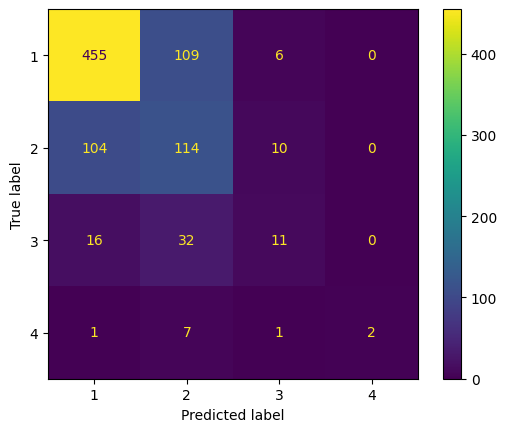

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = mlp_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=mlp_best.classes_)
disp.plot()
plt.show()

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           1       0.79      0.80      0.79       570
           2       0.44      0.50      0.47       228
           3       0.39      0.19      0.25        59
           4       1.00      0.18      0.31        11

    accuracy                           0.67       868
   macro avg       0.65      0.42      0.45       868
weighted avg       0.67      0.67      0.66       868



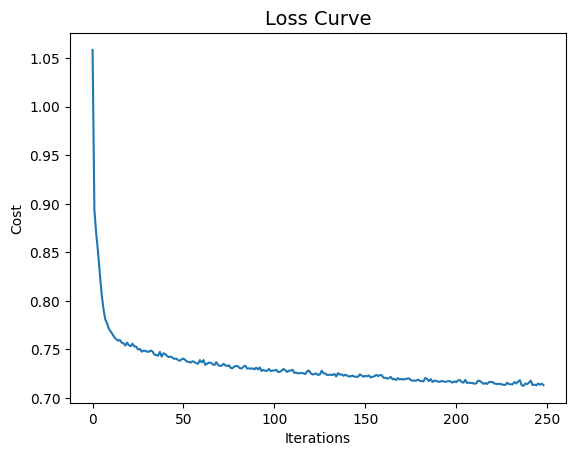

In [33]:
plt.plot(mlp_best.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [34]:
import pickle
pickle.dump(mlp_best, open("models/Classification_MLP.pkl", "wb"))

In [35]:
import numpy as np

print("X Min:")
print(np.min(X, axis=0))
print("\nX Max:")
print(np.max(X, axis=0))

X Min:
age                                 3
selling_price                   20000
km_driven                           1
fuel_Diesel                     False
fuel_Other                      False
fuel_Petrol                     False
seller_type_Dealer              False
seller_type_Individual          False
seller_type_Trustmark Dealer    False
transmission_Automatic          False
transmission_Manual             False
dtype: object

X Max:
age                                  31
selling_price                   8900000
km_driven                        806599
fuel_Diesel                        True
fuel_Other                         True
fuel_Petrol                        True
seller_type_Dealer                 True
seller_type_Individual             True
seller_type_Trustmark Dealer       True
transmission_Automatic             True
transmission_Manual                True
dtype: object
